In [45]:
## Imports & options
import pandas as pd
import os
pd.set_option('display.max_colwidth', None)
FILE_NAME = "eng_restaurant_train_alltasks.jsonl"

file_name = os.path.join('data', FILE_NAME)


In [46]:
def convert_df(data):
	quadruplet_data = []
	c = 0
	for index, row in data.iterrows():
		for quad in row['Quadruplet']:
			quadruplet_data.append({
				'ID': row['ID'],
				'Text': row['Text'],
				'Aspect': quad['Aspect'],
				'Category': quad['Category'],
				'TOPIC': quad['Category'].split('#')[0],
				'Opinion': quad['Opinion'],
				#'VA': quad['VA'],
				'Valence': float(quad['VA'].split('#')[0]),
				'Arousal': float(quad['VA'].split('#')[1]),
			})
	quadruplet_data = pd.DataFrame(quadruplet_data)
	return quadruplet_data

In [47]:
data = pd.read_json(file_name, lines=True)
print(data.shape)
data = convert_df(data)
print(data.shape)
print('Quadruplet counts per review:\n', data.groupby('ID').size().value_counts())
display(data)

(2284, 3)
(3659, 8)
Quadruplet counts per review:
 1     1396
2      567
3      217
4       78
5       14
6        8
7        2
26       1
8        1
Name: count, dtype: int64


,ID,Text,Aspect,Category,TOPIC,Opinion,Valence,Arousal
0,rest16_quad_dev_1,ca n ' t wait wait for my next visit .,NULL,RESTAURANT#GENERAL,RESTAURANT,NULL,6.75,6.38
1,rest16_quad_dev_2,"their sake list was extensive , but we were looking for purple haze , which was n ' t listed but made for us upon request !",sake list,DRINKS#STYLE_OPTIONS,DRINKS,extensive,7.83,8.00
2,rest16_quad_dev_2,"their sake list was extensive , but we were looking for purple haze , which was n ' t listed but made for us upon request !",NULL,SERVICE#GENERAL,SERVICE,NULL,5.00,5.00
3,rest16_quad_dev_3,"the spicy tuna roll was unusually good and the rock shrimp tempura was awesome , great appetizer to share !",spicy tuna roll,FOOD#QUALITY,FOOD,unusually good,7.50,7.62
4,rest16_quad_dev_3,"the spicy tuna roll was unusually good and the rock shrimp tempura was awesome , great appetizer to share !",rock shrimp tempura,FOOD#QUALITY,FOOD,awesome,8.25,8.38
...,...,...,...,...,...,...,...,...
3654,rest16_quad_train_1527,"the waitress came to check in on us every few minutes , and began to clear the plates while half of us were still eating ( a big pet peeve of mine that happens almost everywhere , so i try to ignore it ) .",waitress,SERVICE#GENERAL,SERVICE,NULL,3.12,6.88
3655,rest16_quad_train_1528,"i could n ' t ignore the fact that she reach over the plate of one of my friends , who was in mid bite , to clear the table .",NULL,SERVICE#GENERAL,SERVICE,NULL,4.50,4.50
3656,rest16_quad_train_1529,"she then put the check down without asking if we were done , and came to check on the bill every two minutes , even though we were one of three occupied tables .",NULL,SERVICE#GENERAL,SERVICE,NULL,4.75,5.25
3657,rest16_quad_train_1530,"i wish i could like this place more , and i wish someone would retrain the staff .",place,RESTAURANT#GENERAL,RESTAURANT,NULL,4.62,5.12


In [48]:
# Step 1: Find the ID that appears the most times
most_frequent_id = data.groupby('ID').size().idxmax()

# Step 2: Filter the dataframe to show all rows with this ID
most_frequent_rows = data[data['ID'] == most_frequent_id]

# Optionally, display the rows
display(most_frequent_rows)

,ID,Text,Aspect,Category,TOPIC,Opinion,Valence,Arousal
607,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",sushi,FOOD#QUALITY,FOOD,NULL,6.00,6.00
608,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",fish,FOOD#STYLE_OPTIONS,FOOD,love,7.33,7.50
609,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",sake,DRINKS#QUALITY,DRINKS,great,7.50,7.67
610,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",soho location,LOCATION#GENERAL,LOCATION,killer,8.00,8.33
611,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",salmon,FOOD#QUALITY,FOOD,NULL,6.00,6.00
612,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",tuna,FOOD#QUALITY,FOOD,NULL,6.00,6.00
613,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",fluke,FOOD#QUALITY,FOOD,NULL,6.00,6.00
614,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",yellow tail,FOOD#QUALITY,FOOD,NULL,6.00,6.00
615,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop , oysters , and a varity of toro .",cod,FOOD#QUALITY,FOOD,NULL,6.00,6.00
616,rest16_quad_test_198,"your a sushi fan , you love expertly cut fish , great sake , a killer soho location , and of course : salmon , tuna , fluke , yellow tail , cod , mackeral , jellyfish , sea urchin , shrimp , lobster , sea bream , trout , milk fish , blue fin tuna , eel , crab , sardine , monk fish , roe , scallop

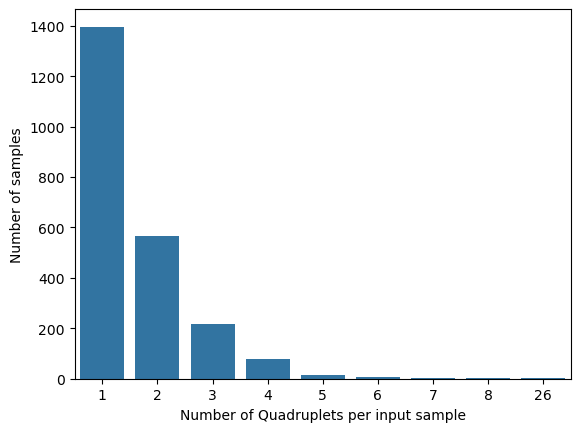

In [49]:
counts_of_counts = data.groupby('ID').size().value_counts().sort_index()
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=counts_of_counts.index, y=counts_of_counts.values)
plt.xlabel('Number of Quadruplets per input sample')
plt.ylabel('Number of samples')
plt.show()

## Cat data

14


Category
FOOD#QUALITY                1282
SERVICE#GENERAL              680
RESTAURANT#GENERAL           579
AMBIENCE#GENERAL             398
FOOD#STYLE_OPTIONS           192
RESTAURANT#MISCELLANEOUS     135
FOOD#PRICES                  111
RESTAURANT#PRICES            101
DRINKS#QUALITY                66
DRINKS#STYLE_OPTIONS          47
Name: count, dtype: int64

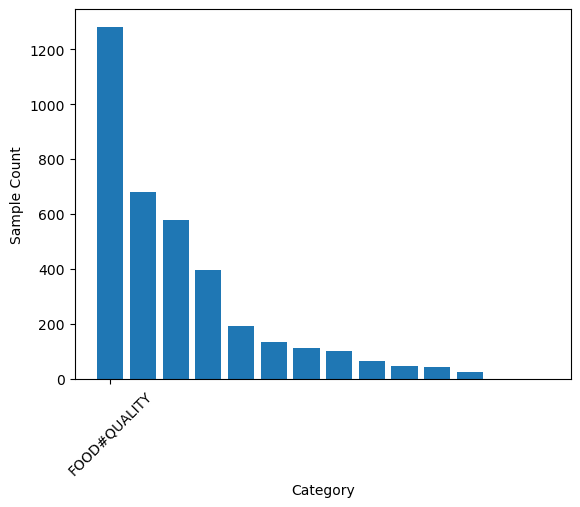

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the bar chart
categories_count = data['Category'].value_counts().sort_values(ascending=False)
print(len(categories_count))
display(categories_count.head(10))
plt.bar(categories_count.index, categories_count.values)

# Labeling the axes
plt.xlabel('Category')
plt.ylabel('Sample Count')

# Set x-ticks to match the positions of the bars
xtick_positions = np.arange(len(categories_count))

# Set xticks to these positions and rotate the labels for better visibility
plt.xticks(xtick_positions[::15], categories_count.index[::15], rotation=45)

# Show the plot
plt.show()


In [51]:
# Display the longest Text
longest_text = data.loc[data['Text'].str.len().idxmax()]
print(f"Longest Text: {longest_text}")

Longest Text: ID                                                                                                                                                                                                                                                                                                                                                                                                    rest16_quad_train_965
Text        fabulous decor - makes you feel like you ' re in a trendy manhattan restaurant , very very good food , cheaply - priced , generally friendly staff , and if you ' re a manhattanite , or spend most of your time in manhattan , rice avenue will make you feel at home . . . . . very soho / village / upper west side minus the expensive prices and pretentious clientele . . . . . all on roosevelt avenue !
Aspect                                                                                                                                                            

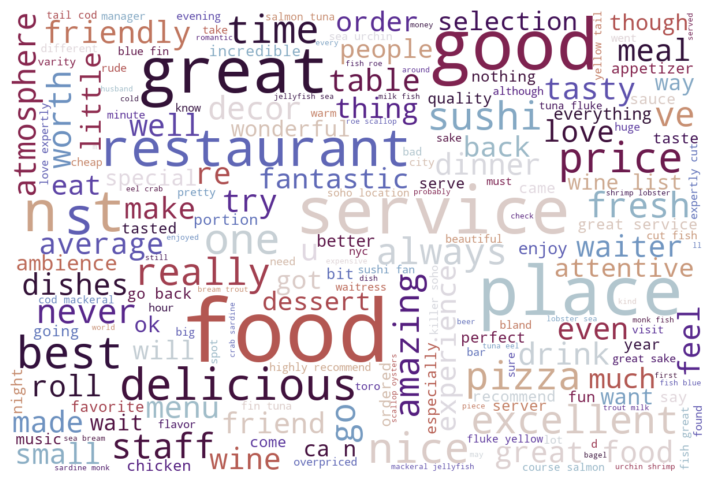

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Count the frequency of aspects
aspect_counts = data['Aspect'].explode().value_counts()

# Word Cloud for review text
text = ' '.join(data['Text']).lower()
wordcloud = WordCloud(
    background_color='white',
    max_font_size=150,  # Larger font size for emphasis
    width=1200,         # Wider image
    height=800,         # Taller image
    max_words=200,      # More words
    contour_width=2,    # Contour around the words
    contour_color='black',  # Contour color
    colormap='twilight',  # No yellow in this colormap
).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


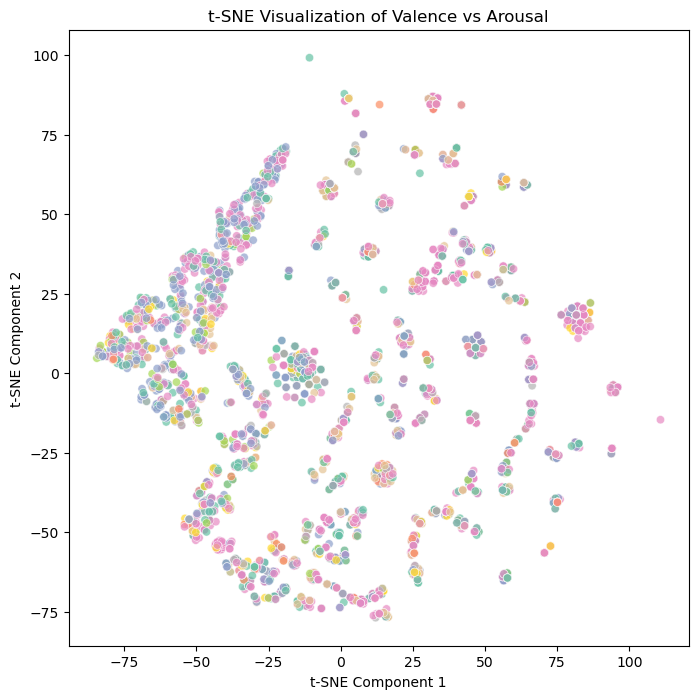

In [53]:
from sklearn.manifold import TSNE

# Fit t-SNE to your data
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data[['Valence', 'Arousal']])
# Plot t-SNE result
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=data['Category'], alpha=0.7, palette="Set2", legend=None)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Valence vs Arousal")
plt.show()


Category
FOOD#QUALITY                1282
SERVICE#GENERAL              680
RESTAURANT#GENERAL           579
AMBIENCE#GENERAL             398
FOOD#STYLE_OPTIONS           192
RESTAURANT#MISCELLANEOUS     135
FOOD#PRICES                  111
RESTAURANT#PRICES            101
DRINKS#QUALITY                66
DRINKS#STYLE_OPTIONS          47
Name: count, dtype: int64

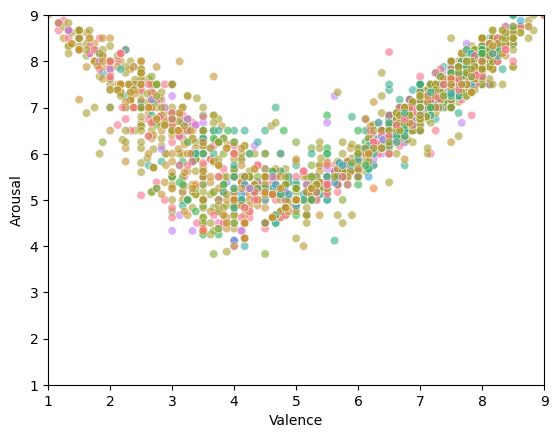

In [54]:

# Set the axis limits to range from 1 to 9 for both axes
plt.xlim(1, 9)  # Set the x-axis range
plt.ylim(1, 9)  # Set the y-axis range
sns.scatterplot(x="Valence", y="Arousal", hue="Category", data=data, legend=None, alpha=0.6)
data['Category'].value_counts().head(10)

399

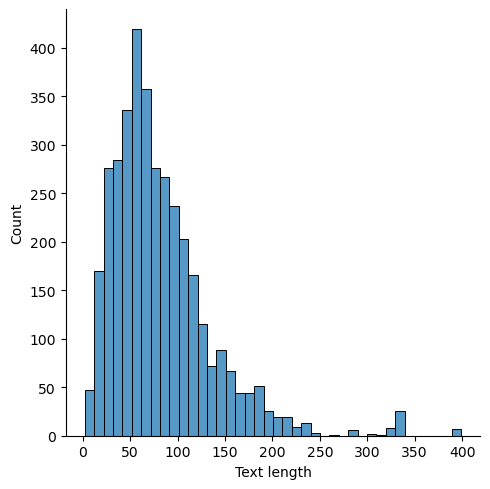

In [55]:
sns.displot(data=pd.DataFrame({'Text length': list(map(len, data['Text']))}), x='Text length', bins=40)
max(pd.DataFrame({'Text length': list(map(len, data['Text']))})['Text length'])

KeyboardInterrupt: 

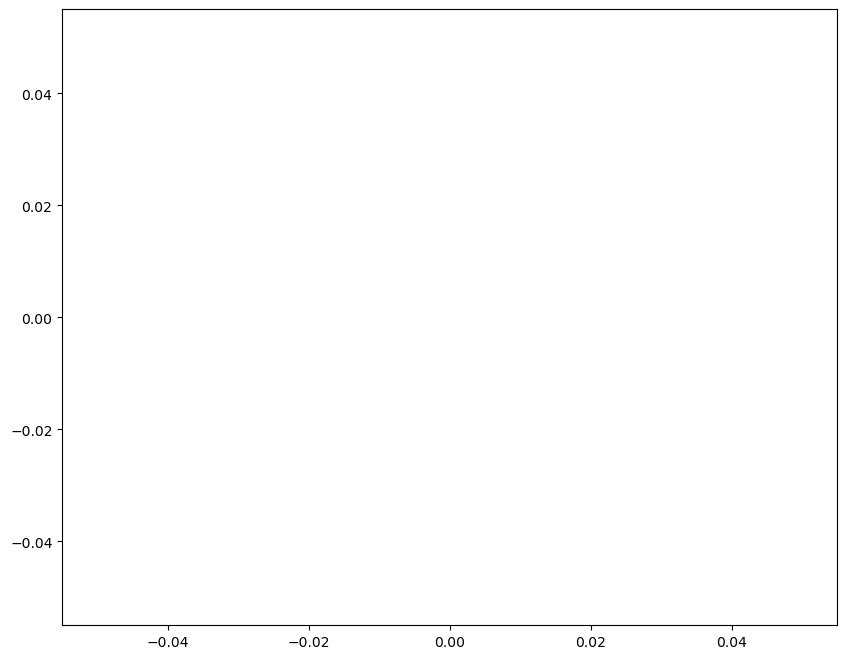

In [56]:

# Creating the figure and axis
fig = plt.figure(figsize=(10, 8))

# Create the KDE plot for Valence vs Arousal with more colors
sns.kdeplot(x="Valence", y="Arousal", data=data, cmap="Spectral", fill=True, bw_adjust=0.2, levels=20)

# Set the axis limits to range from 1 to 9 for both axes
plt.xlim(1, 9)  # Set the x-axis range
plt.ylim(1, 9)  # Set the y-axis range

# Adding labels and title
plt.xlabel("Valence")
plt.ylabel("Arousal")

# Show the plot
plt.show()

(1.0, 9.0)

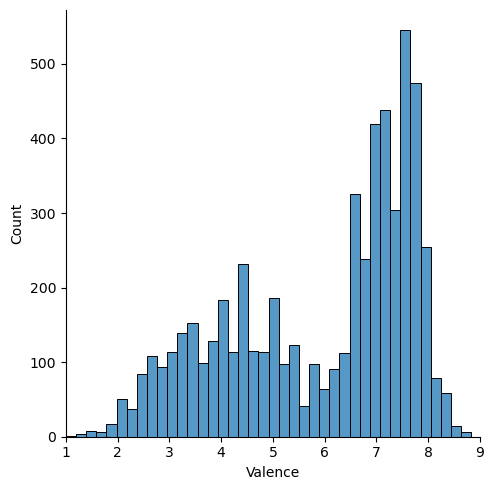

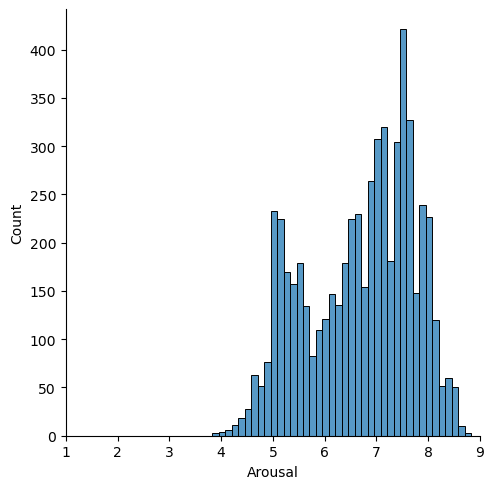

In [ ]:
import seaborn as sns
sns.displot(data=data, x='Valence', bins=40)
plt.xlim(1, 9)  # Set the x-axis range

sns.displot(data=data, x='Arousal', bins=40)
plt.xlim(1, 9)  # Set the x-axis range


In [ ]:
da = []
do = []
for idx, row in data.iterrows():
	s = row['Text']
	c = 0
	n = 0
	while s.find(row['Aspect'], c) != -1:
		c = s.find(row['Aspect'], c) + 1
		n+=1
	if n > 1:
		da += [(n, row['Aspect'], row['Opinion'], row['Text'], row['ID'])]
	c = 0
	n = 0
	while s.find(row['Opinion'], c) != -1:
		c = s.find(row['Opinion'], c) + 1
		n+=1
	if n > 1:
		do += [(n, row['Aspect'], row['Opinion'], row['Text'], row['ID'])]

print("DA===========================\n")
for d in da:
	print(d)
print("DO===========================\n")
for d in do:
	print(d)

DA===========================

(2, 'version', 'least favorite', "this version has been my least favorite version i ' ve had for the following reasons listed bellow the pros .", 'laptop_quad_dev_4')
(2, 'laptop', 'pretty fast', "it ' s pretty fast for a laptop especially a laptop in this price point .", 'laptop_quad_dev_52')
(3, 'android', 'fun', 'so android is fun for tablet features , but its like embedding an android inside , without letting android apps out to utilize the full abilities of the chromium system .', 'laptop_quad_dev_113')
(3, 'android', 'NULL', 'so android is fun for tablet features , but its like embedding an android inside , without letting android apps out to utilize the full abilities of the chromium system .', 'laptop_quad_dev_113')
(2, 'hardware', 'high', 'apple has always priced their hardware high , but you could always make an argument for the style , nice hardware and the unique osx experience .', 'laptop_quad_dev_174')
(2, 'wifi', 'NULL', 'using wifi the sig

In [ ]:
print('Rows:', data.shape)
for col in data.columns:
    print(f'{col:<20}: ({(data[col] == "NULL").sum():>2} null) [{data[col].dtype}]')
print('\nTopics count:', data['TOPIC'].value_counts().count())
print('\nCategory count:', data['Category'].value_counts().count())
data['TOPIC'].value_counts()

Rows: (5773, 8)
ID                  : ( 0 null) [object]
Text                : ( 0 null) [object]
Aspect              : (1254 null) [object]
Category            : ( 0 null) [object]
TOPIC               : ( 0 null) [object]
Opinion             : (1583 null) [object]
Valence             : ( 0 null) [float64]
Arousal             : ( 0 null) [float64]

Topics count: 23

Category count: 121


TOPIC
LAPTOP                2952
DISPLAY                514
KEYBOARD               504
BATTERY                259
SOFTWARE               231
OS                     184
HARDWARE               181
MULTIMEDIA_DEVICES     165
SUPPORT                149
PORTS                  106
COMPANY                 91
POWER_SUPPLY            84
CPU                     75
HARD_DISK               71
MEMORY                  65
SHIPPING                47
GRAPHICS                29
FANS_COOLING            27
WARRANTY                12
OUT_OF_SCOPE             9
OPTICAL_DRIVES           8
MOUSE                    6
MOTHERBOARD              4
Name: count, dtype: int64

In [ ]:
bow = data['Text'].str.split().explode().value_counts()
display(pd.DataFrame(bow))

,count
Text,
.,5106
the,4563
",",4130
and,3314
it,2540
...,...
showstopper,1
spongy,1
daughters,1


In [ ]:
import torch.utils.data as data_utils
import torch
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.7
train_dataset, val_dataset = train_test_split(data, test_size=TRAIN_SIZE, random_state=42)
train_dataset

OSError: [WinError 127] The specified procedure could not be found. Error loading "c:\Users\KebabWarrior\miniconda3\envs\nlp\lib\site-packages\torch\lib\c10_cuda.dll" or one of its dependencies.

In [ ]:
train_dataset[:5]

,ID,Text,Aspect,Category,TOPIC,Opinion,Valence,Arousal
1956,laptop_quad_train_246,"- though the case is plastic , the keyboard area itself has a cold metallic feel .",case,LAPTOP#DESIGN_FEATURES,LAPTOP,NULL,5.38,5.25
3178,laptop_quad_train_1155,"the mac pro is also very fast , and i have only experienced the rainbow wheel once or twice whenever i was on a website that wasn ' t responding .",mac pro,LAPTOP#OPERATION_PERFORMANCE,LAPTOP,very fast,7.62,7.62
3192,laptop_quad_train_1164,love this mac book pro .,mac book pro,LAPTOP#GENERAL,LAPTOP,love,7.62,7.88
1307,laptop_quad_test_630,but asus engineers designed the case and laptop not to be opened by users .,laptop,LAPTOP#OPERATION_PERFORMANCE,LAPTOP,NULL,4.50,5.17
2003,laptop_quad_train_283,the screen looks good despite some other reviews .,screen,DISPLAY#GENERAL,DISPLAY,good,7.25,7.38


In [ ]:
c = []
for idx, x in data.iterrows():
	for i in range(len(x['Quadruplet'])):
		if (not x['Text'].find(x['Quadruplet'][i]['Opinion']) != -1 and x['Quadruplet'][i]['Opinion'] != 'NULL') \
			or ( not x['Text'].find(x['Quadruplet'][i]['Aspect']) != -1 and x['Quadruplet'][i]['Aspect'] != 'NULL'):
			c.append(x)
			print(x)
			print (x['Text'].find(x['Quadruplet'][i]['Opinion']), x['Quadruplet'][i]['Opinion'],
				x['Quadruplet'][i]['Opinion'] != 'NULL',
				x['Text'].find(x['Quadruplet'][i]['Aspect']), x['Quadruplet'][i]['Aspect'],
				x['Quadruplet'][i]['Aspect'] != 'NULL',
				)

## = 0 so all spans are continous
print(len(c))
for t in c:
	print(t)

0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk import Tree
def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_

def ex3(sentences):
    items = sentences
    sentences = sentences['Text'].values
    import spacy
    from spacy import displacy
    nlp = spacy.load("en_core_web_sm")

    print("Dependency Parsing Results:\
")
    for i, sentence in enumerate(sentences, 1):
        doc = nlp(sentence)
        print("-" * 80)
        print(f"Sentence {i}: {sentence}")
        displacy.render(doc, style="dep", jupyter=True)
        print("ID:", items.iloc[i - 1]['ID'])
        print("Aspect and Opinion columns:")
        print(data.loc[data['ID'] == items.iloc[i - 1]['ID'], ['Aspect', 'Opinion']])
        # [to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

ex3(train_dataset[:20])
print("=" * 80)

Dependency Parsing Results:
--------------------------------------------------------------------------------
Sentence 1: - though the case is plastic , the keyboard area itself has a cold metallic feel .


ID: laptop_quad_train_246
Aspect and Opinion columns:


KeyError: "None of [Index(['Aspect', 'Opinion'], dtype='object')] are in the [columns]"

In [ ]:
import json, os, pandas
for file in os.listdir('data/'):
	print(file)
	with open(os.path.join('data', file), 'r', encoding='utf-8') as f:
		data = pandas.read_json(f, lines=True)
		print(max(map(lambda x: len(x), data['Text'].values)))

eng_laptop_dev_task3.jsonl
222
eng_laptop_train_alltasks.jsonl
485
eng_restaurant_dev_task3.jsonl
224
eng_restaurant_train_alltasks.jsonl
399
